<a href="https://colab.research.google.com/github/sahibpreetsingh12/100daysofcode/blob/master/vgg_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16



In [0]:
from keras.utils.vis_utils import plot_model
# load the model
model = VGG16()
plot_model(model, to_file='vgg.png')

In [0]:

# load an image from file
image = load_img('Beach.jpg', target_size=(224, 224))

In [0]:
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
"""
The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.
"""
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [0]:
"""
Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the paper:

The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.
Keras provides a function called preprocess_input() to prepare new input for the network.
"""
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)

In [0]:
# predict the probability across all output classes
yhat = model.predict(image)


In [0]:
"""
Keras provides a function to interpret the probabilities called decode_predictions().

It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo.

"""
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

seashore (55.00%)


In [0]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv2').output)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

In [0]:
print(block4_pool_features.shape)

(1, 28, 28, 512)


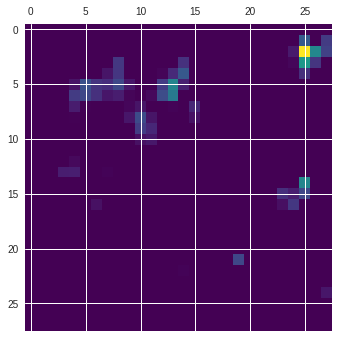

In [0]:
import matplotlib.pyplot as plt
plt.matshow(block4_pool_features[0, :, :, 511], cmap='viridis')

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________